In [1]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from common.util import *

In [2]:
""" seed """
seeds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

""" participant """
name = "self_play"

""" policy """
name_policy = "greedy"

""" condition """
conds = ["1on1", "2on1", "2on1", "3on1", "3on1"] 

""" speed """
speed = "slow" # "slow", "equal" or "fast"

""" reward """
rewards = ["indiv", "indiv", "share", "indiv", "share"]


In [3]:
all_outcomes = []
all_durations = []
for num in range(len(conds)):
    
    cond = conds[num]
    reward_p = rewards[num]
        
    seed_outcomes = []
    seed_durations = [] 

    """ seed """
    for seed in seeds:

        if cond == "1on1":
            rep = np.load("self_play_results/results_1on1_" + name + "_" +  speed + "_" + name_policy + "_seed_" + str(seed) + ".npz", allow_pickle=True)
        elif cond == "2on1":
            rep = np.load("self_play_results/results_2on1_" + name + "_" + reward_p + "_" +  speed + "_" + name_policy + "_seed_" + str(seed) + ".npz", allow_pickle=True)
        elif cond == "3on1":
            rep = np.load("self_play_results/results_3on1_" + name + "_" + reward_p + "_" +  speed + "_" + name_policy + "_seed_" + str(seed) + ".npz", allow_pickle=True)
        
        pos_list = np.array(rep["pos"]).squeeze()
        val_list = np.array(rep["q"]).squeeze()
        vrep_list = np.array(rep["rep_v"]).squeeze()
        arep_list = np.array(rep["rep_a"]).squeeze()

        outcomes = []
        durations = []

        outcome = 100
        epis = 100
        for epi in range(epis):

            pos_e = np.array(pos_list[epi][0])
            pos_p1 = np.array(pos_list[epi][1])

            if cond == "1on1":
                dist1 = get_dist(pos_e[-1], pos_p1[-1])

                if dist1 <= 0.1:
                    outcome -= 1  
                elif pos_e[-1 ,0] < -1 or pos_e[-1 ,0] > 1 or pos_e[-1 ,1] < -1 or pos_e[-1 ,1] > 1:
                    outcome -= 1

            if cond == "2on1":

                pos_p2 = np.array(pos_list[epi][2])
                dist1 = get_dist(pos_e[-1], pos_p1[-1])
                dist2 = get_dist(pos_e[-1], pos_p2[-1])

                if dist1 <= 0.1 or dist2 <= 0.1:
                    outcome -= 1
                elif pos_e[-1 ,0] < -1 or pos_e[-1 ,0] > 1 or pos_e[-1 ,1] < -1 or pos_e[-1 ,1] > 1:
                    outcome -= 1

            if cond == "3on1":

                pos_p2 = np.array(pos_list[epi][2])
                pos_p3 = np.array(pos_list[epi][3])
                dist1 = get_dist(pos_e[-1], pos_p1[-1])
                dist2 = get_dist(pos_e[-1], pos_p2[-1])
                dist3 = get_dist(pos_e[-1], pos_p3[-1])

                if dist1 <= 0.1 or dist2 <= 0.1 or dist3 <= 0.1:
                    outcome -= 1
                elif pos_e[-1 ,0] < -1 or pos_e[-1 ,0] > 1 or pos_e[-1 ,1] < -1 or pos_e[-1 ,1] > 1:
                    outcome -= 1             

            duration = len(np.array(pos_list[epi][0]))
            durations.append(duration)

        outcomes = (100 - outcome)/100
        mean_durations = np.array(durations).mean()/10
        seed_outcomes.append(outcomes)
        seed_durations.append(mean_durations)
        
    all_outcomes.append(seed_outcomes)
    all_durations.append(seed_durations)

mean outcomes [0.152 0.273 0.642 0.869 0.895]
s.e.m outcomes [0.01017841 0.0182784  0.01309962 0.01388884 0.00790569]
mean theory [0.152     0.27986   0.3875924]
s.e.m theory [0.01017841 0.01698857 0.02129531]


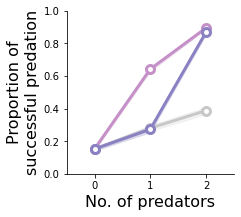

In [4]:
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111)

purple = [137/255, 129/255, 194/255]
pink = [196/255, 144/255, 199/255]
gray = [200/255, 200/255, 200/255]

marker_purple = {
    "markersize": 8,
    "markeredgewidth": 3.0,
    "markeredgecolor": purple,
    "markerfacecolor": "white",
    "color": purple,
    "linewidth": 3,
    "alpha": 1
}

marker_pink = {
    "markersize": 8,
    "markeredgewidth": 3.0,
    "markeredgecolor": pink,
    "markerfacecolor": "white",
    "color": pink,
    "linewidth": 3,
    "alpha": 1
}

marker_gray = {
    "markersize": 8,
    "markeredgewidth": 3.0,
    "markeredgecolor": gray,
    "markerfacecolor": "white",
    "color": gray,
    "linewidth": 3,
    "alpha": 1
}


all_theories = []
for i in range(len(seeds)):
    outcome = all_outcomes[0][i]
    theory= np.array([outcome, 1-(1-outcome)**2, 1-(1-outcome)**3])
    all_theories.append(theory)

mean_o = np.array(all_outcomes).mean(1)
se_o = np.array(all_outcomes).std(1)/np.sqrt(10)
mean_t = np.array(all_theories).mean(0)
se_t = np.array(all_theories).std(0)/np.sqrt(10)

print("mean outcomes", mean_o)
print("s.e.m outcomes", se_o)

print("mean theory", mean_t)
print("s.e.m theory", se_t)

xs = range(3)
mean_prop_indiv = [mean_o[0], mean_o[1], mean_o[3]]
mean_prop_share = [mean_o[0], mean_o[2], mean_o[4]]

se_prop_indiv = [se_o[0], se_o[1], se_o[3]]
se_prop_share = [se_o[0], se_o[2], se_o[4]]

ax.fill_between(xs, np.array(mean_t) - np.array(se_t), np.array(mean_t) + np.array(se_t), color=gray, alpha=0.2)
ax.fill_between(xs, np.array(mean_prop_share) - np.array(se_prop_share), np.array(mean_prop_share) + np.array(se_prop_share), color=pink, alpha=0.2)
ax.fill_between(xs, np.array(mean_prop_indiv) - np.array(se_prop_indiv), np.array(mean_prop_indiv) + np.array(se_prop_indiv), color=purple, alpha=0.2)

plt.plot(xs, mean_t, 'o-', **marker_gray)
plt.plot(xs, mean_prop_share, 'o-', **marker_pink)
plt.plot(xs, mean_prop_indiv, 'o-', **marker_purple)

ax.set_xlim(-0.5, 2.5)
ax.set_ylim(0, 1)
ax.set_xlabel("No. of predators", fontsize=16)
ax.set_ylabel("Proportion of\nsuccessful predation", fontsize=16)
[ax.spines[side].set_visible(False) for side in ['right', 'top']];

mean durations [27.576  24.1746 18.0134  7.7783  8.2409]
s.e.m durations [0.06655587 0.13961252 0.12580313 0.12505703 0.07273862]


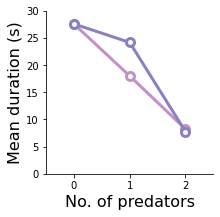

In [5]:
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111)

mean_d = np.array(all_durations).mean(1)
se_d = np.array(all_durations).std(1)/np.sqrt(100)

print("mean durations", mean_d)
print("s.e.m durations", se_d)

xs = range(3)
mean_duration_indiv = [mean_d[0], mean_d[1], mean_d[3]]
mean_duration_share = [mean_d[0], mean_d[2], mean_d[4]]

se_duration_indiv = [se_d[0], se_d[1], se_d[3]]
se_duration_share = [se_d[0], se_d[2], se_d[4]]

ax.fill_between(xs, np.array(mean_duration_share) - np.array(se_duration_share), np.array(mean_duration_share) + np.array(se_duration_share), color=pink, alpha=0.2)
ax.fill_between(xs, np.array(mean_duration_indiv) - np.array(se_duration_indiv), np.array(mean_duration_indiv) + np.array(se_duration_indiv), color=purple, alpha=0.2)

plt.plot(xs, mean_duration_share, "o-", **marker_pink)
plt.plot(xs, mean_duration_indiv, "o-", **marker_purple)

ax.set_xlim(-0.5, 2.5)
ax.set_ylim(0, 30)
ax.set_xlabel("No. of predators", fontsize=16)
ax.set_ylabel("Mean duration (s)", fontsize=16)
[ax.spines[side].set_visible(False) for side in ['right', 'top']];